In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [36]:
data = pd.read_excel('Data for identifying the drivers for sectoral WUI.xlsx')


In [37]:
#3.1
my_data=data.dropna()
my_data

Province  Year        PIRR          AIRR       WCI     IRR WUI  \
0       Anhui  1975  418.943076  29930.904227  0.019706  775.065446   
1       Anhui  1976  463.369634  18491.148830  0.020940  746.094373   
2       Anhui  1977  468.093808  21995.614134  0.022175  761.651117   
3       Anhui  1978  542.566592  14670.005881  0.023410  767.420515   
4       Anhui  1979  622.801535  19082.387416  0.024406  771.687823   
...       ...   ...         ...           ...       ...         ...   
1240    China  2006  753.358780   2509.232402  0.402256  568.994017   
1241    China  2007  772.434109   2436.059831  0.415608  558.889572   
1242    China  2008  706.154545   2562.046469  0.417903  541.817354   
1243    China  2009  748.796515   2208.054338  0.434602  534.412280   
1244    China  2010  740.422270   2888.807339  0.452608  531.422639   

      revised IRR WUI  Ratio of industrial water recycling  \
0          775.065446                             0.000000   
1          717.345493                             0.000000   
2          737.127359                             0.000000   
3          798.875848                             0.000000   
4          828.967468                             0.007621   
...               ...                                  ...   
1240       565.546533                             0.796000   
1241       554.729770                             0.836600   
1242       537.895655                             0.860200   
1243       532.677408                             0.856400   
1244       530.182192                             0.862600   

      Ratio of industrial water evaporated   IND WUI  revised IND WUI  
0                                 0.306688  0.310811         0.310811  
1                                 0.290317  0.296136         0.289606  
2                                 0.273163  0.279693         0.265661  
3                                 0.315550  0.212044         0.194575  
4                                 0.243994  0.187960         0.168401  
...                                    ...       ...              ...  
1240                              0.414364  0.010337         0.005582  
1241                              0.415877  0.010086         0.005545  
1242                              0.417868  0.010139         0.005675  
1243                              0.419066  0.009714         0.005124  
1244                              0.423629  0.009239         0.004956  

[1152 rows x 11 columns]

<AxesSubplot:title={'center':'Guangdong'}, xlabel='Year'>

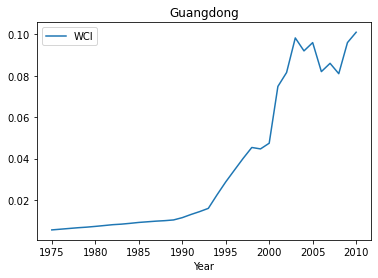

In [38]:
#3.2

#展示了广东省从过去到现在的节水灌溉配备面积与灌溉总面积的比值的折线图，从图中可知节水灌溉比值总体是上升的。
df_1=my_data[my_data['Province']=='Guangdong']

df_1.plot(x='Year',y=['WCI'],title = 'Guangdong')


In [39]:
#3.3
#平均节水灌溉占比最高的是甘肃，其次是shanxi，第三是上海。
df_2=my_data.groupby(['Province']).mean().loc[:,['WCI']].sort_values(['WCI'],ascending=False).head(3)
df_2

WCI
Province          
Gansu     0.378868
Shanxi    0.349339
Shanghai  0.344383

In [48]:
#天津的平均再生水占工业用水总量的比例最高,shanxi第二，河北第三。
df_3=my_data.loc[:,['Province','Ratio of industrial water recycling']]

df_4=df_3.groupby(['Province']).mean().loc[:,['Ratio of industrial water recycling']].sort_values(['Ratio of industrial water recycling'],ascending=False)
df_4.head(3)

Ratio of industrial water recycling
Province                                     
Tianjin                              0.550846
Shanxi                               0.550624
Hebei                                0.540625

In [50]:
#黑龙江的蒸发水占工业用水量最大，其次是广东，第三是江苏。
df=my_data.loc[:,['Province','Ratio of industrial water evaporated']]
df_5=df.groupby(['Province']).mean().loc[:,['Ratio of industrial water evaporated']].sort_values(['Ratio of industrial water evaporated'],ascending=False)
df_5.head(3)

Ratio of industrial water evaporated
Province                                          
Heilongjiang                              0.434620
Guangdong                                 0.406227
Jiangsu                                   0.400190

In [52]:
#广西的潜在灌溉需要总量最大
df_6=my_data.groupby(['Province']).sum().loc[:,['PIRR']].sort_values(['PIRR'],ascending=False)
df_6.head(1)

PIRR
Province              
Guangxi   54117.954769

<AxesSubplot:title={'center':'Guangdong&Beijing'}, xlabel='Year'>

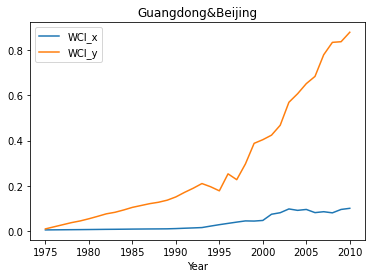

In [53]:
#广东的节水灌溉占比远北京的小
df4=my_data[my_data['Province']=='Guangdong']
df5=my_data[my_data['Province']=='Beijing']
com_df=df4.merge(df5, on='Year')
com_df
com_df.plot(x='Year',y=['WCI_x','WCI_y'],title='Guangdong&Beijing')